In [312]:
import pandas as pd 
df=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [313]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [314]:
len(set([x.lower() for x in df['Company Name']])) #unique company names

439

In [315]:
len(set([x.lower() for x in df['company phone']])) #unique company phones

430

In [316]:
result={}
result['How many different companies are represented in the data set?'] = len(set([x.lower() for x in df['Company Name']]))

In [317]:
# one of the cases in which same company phone is entered for different company names:
from collections import Counter
counts= Counter(df['company phone'])
duplicates=[x for x in counts if counts[x]>1]
df[df['company phone']==duplicates[0]]

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.96492,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
13,25 Broadway (Ldmk),David Neiburg,Eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,22 story building,...,2274391.35,Brooklyn,40.624784,-73.96492,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
18,75 Broad Street,David Neiburg,Eskoblo@energyspec.com,7186779077,1114 Ave J,Brooklyn,NY,11230,Commercial,NaN,...,6699791.27,Brooklyn,40.624784,-73.96492,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood


In [318]:
result['What is the total number of jobs created for businesses in Queens?']=np.nansum(df[df['City']=='Queens']['Job created'])
np.nansum(df[df['City']=='Queens']['Job created'])


90.0

In [319]:
domains=[z[-1] for z in [x.split('@') for x in [y for y in df['company email'] if isinstance(y, str)]]]

In [320]:
len(domains)

433

In [321]:
len(set(domains))

361

In [322]:
result['How many different unique email domains names are there in the data set?']=len(set(domains))

In [323]:
df2=[j for i,j in df.groupby('NTA') if len(set(j['Company Name']))>4]
len(df2)

20

In [324]:
df2[0]

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,...,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
10,"195 Broadway, LLC",Robert Riggs,NaN,2129203381,195 Broadway,NY,NY,10007,Commercial,NaN,...,3481992.69,New York,40.710536,-74.009378,101.0,1.0,13.0,1001227.0,1.000800e+09,Battery Park City-Lower Manhattan
11,2 Rector Street (NY) LLC,Camille Giardina,Camellia.Giardina@am.jll.com,2126195920,2 Rector Street,New York,NY,10006,Landlord,Back Offices,...,221193.90,New York,40.707808,-74.013053,101.0,1.0,13.0,1001031.0,1.000510e+09,Battery Park City-Lower Manhattan
90,Brunetti & Brunetti LLC,Cheryl Brunetti,NaN,2129513501,40 Rector Street,NY,NY,10006,Commercial,NaN,...,35001.67,New York,40.708356,-74.014814,101.0,1.0,13.0,1088750.0,1.000558e+09,Battery Park City-Lower Manhattan
110,Constitution Realty LLC (Ldmk),Joe Dorio,NaN,2123442151,26 Broadway,New York,NY,10004,Landlord,NaN,...,2827023.71,New York,40.705680,-74.013302,101.0,1.0,9.0,1000811.0,1.000220e+09,Battery Park City-Lower Manhattan
124,"DBAB Wall Street, LLC.",Diana Sweeney,NaN,2126165116,"100 William Street, Ste 2002",New York,NY,10038,Commercial,48 story building,...,17023100.96,New York,40.708497,-74.007477,101.0,1.0,1502.0,1001116.0,1.000680e+09,Battery Park City-Lower Manhattan
298,New Water Street Corp,Rich Neal,NaN,2124719465,55 Water Street,New York,NY,10041,Commercial,53 story building,...,3396544.16,New York,40.703597,-74.009781,101.0,1.0,9.0,1083346.0,1.000328e+09,Battery Park City-Lower Manhattan


In [325]:
[np.nanmean(df2[i]['Job created']) for i in range(len(df2))]

/var/folders/5w/sl04hbm52mb6wq_p5svy_8g00000gn/T/ipykernel_10440/1160820038.py:1: RuntimeWarning: Mean of empty slice
  [np.nanmean(df2[i]['Job created']) for i in range(len(df2))]


[nan,
 10.0,
 nan,
 2.0,
 nan,
 nan,
 15.0,
 nan,
 nan,
 nan,
 12.0,
 nan,
 10.0,
 3.3333333333333335,
 nan,
 nan,
 nan,
 20.0,
 nan,
 nan]

In [326]:
[np.nanmean(df2[i]['Total Savings']) for i in range(len(df2))]

[469890.79666666663,
 26140.455,
 24337.390000000003,
 17159.372857142855,
 4036.298888888889,
 59950.340000000004,
 48433.09333333333,
 13990.626363636366,
 9753.649285714286,
 23931.398933333334,
 39246.016153846154,
 2760.8888888888887,
 6658.283333333334,
 17843.937857142857,
 61830.770625,
 37214.024,
 17757.662,
 11227.155714285715,
 14316.976875,
 14327.419333333331]

In [327]:
result['Considering only NTAs with at least 5 listed businesses, what is the average total savings created for each NTA?']=[np.nanmean(df2[i]['Total Savings']) for i in range(len(df2))]


In [328]:
result['Considering only NTAs with at least 5 listed businesses, what is the total jobs created for each NTA?']=[np.nansum(df2[i]['Job created']) for i in range(len(df2))]
       

In [330]:
output=pd.DataFrame(result)
output.iloc[1:,[0,1,2]]=0
output

,How many different companies are represented in the data set?,What is the total number of jobs created for businesses in Queens?,How many different unique email domains names are there in the data set?,"Considering only NTAs with at least 5 listed businesses, what is the average total savings created for each NTA?","Considering only NTAs with at least 5 listed businesses, what is the total jobs created for each NTA?"
0,439,90.0,361,469890.796667,0.0
1,0,0.0,0,26140.455000,10.0
2,0,0.0,0,24337.390000,0.0
3,0,0.0,0,17159.372857,2.0
4,0,0.0,0,4036.298889,0.0
5,0,0.0,0,59950.340000,0.0
6,0,0.0,0,48433.093333,15.0
7,0,0.0,0,13990.626364,0.0
8,0,0.0,0,9753.649286,0.0
9,0,0.0,0,23931.398933,0.0


In [127]:
output.to_csv('Milestone_Day_4.csv')

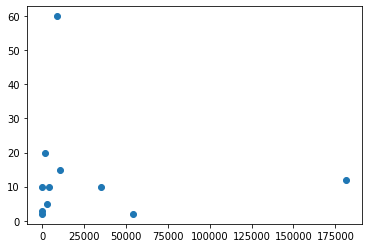

In [138]:
import matplotlib.pyplot as plt
plt.scatter(df['Total Savings'],df['Job created'])

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


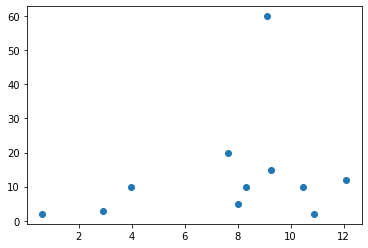

In [139]:
plt.scatter(np.log(df['Total Savings']),df['Job created'])

(array([  1.,   2.,   4.,  14.,  83., 125., 123.,  60.,  20.,  12.]),
 array([ 0.61518564,  1.9802608 ,  3.34533597,  4.71041114,  6.0754863 ,
         7.44056147,  8.80563663, 10.1707118 , 11.53578697, 12.90086213,
        14.2659373 ]),
 <BarContainer object of 10 artists>)

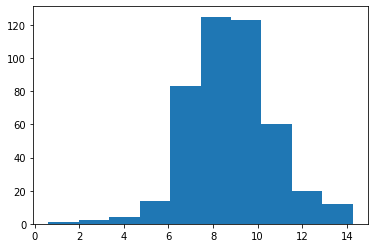

In [150]:
plt.hist(np.log([x for x in df['Total Savings'] if x>0]))

In [332]:
out=[(x.split('/')[0], y) for x,y in zip(df['Effective Date'],df['Job created'])]
result2=[]
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    t=[x for z,x in out if z==month]
    result2.append([month,np.nansum(t)])
result2

[['01', 0.0],
 ['02', 27.0],
 ['03', 20.0],
 ['04', 2.0],
 ['05', 2.0],
 ['06', 63.0],
 ['07', 20.0],
 ['08', 0.0],
 ['09', 0.0],
 ['10', 0.0],
 ['11', 5.0],
 ['12', 10.0]]

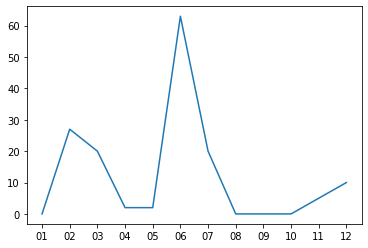

In [333]:
plt.plot([x for x,y in result2],[y for x,y in result2])